In [63]:
import numpy as np
import time
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy import special
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot

## Rebuild the best model given in Table 6

In [57]:
data = pd.read_sas('/home/guangya/Downloads/wnv_2245new.sas7bdat')
x = data[['templag2','templag3','templag4','Jantemp','mirlag1','mirlag2','mirlag3','mirlag4', 'totpop','owpct','dlipct','dfpct','glandpct','hpctpost90']].values
y = data['wnvbinary'].values
x = x.astype('float')
beta = np.array([0.06963,
0.1085,
0.1628,
0.3613,
0.003199,
0.003938,
0.004003,
0.003958,
0.000225,
-0.05527,
0.01848,
-0.02401,
-0.04603,
-0.00546])
z = np.array([1.1769])
random = data['hexid'].values
random = random.reshape(len(random),1)
y_pred = special.expit(x@beta + random@z) # Formula for GLMM

In [58]:
auc = roc_auc_score(y, y_pred) # The result is really bad, not sure why

In [59]:
auc

0.5026111477762134

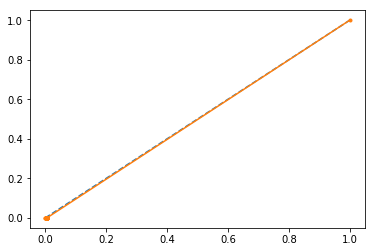

In [64]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, 1-y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### Rebuild the model for Table 5

In [25]:
## Comments： The GLMM implemented in python is not good. It does not have the same parameter set as in the original sas file and the documentation is also confusing. Will 
## try use R in the future, tried it once but it was super slow. Also, the features given in the best model is different from table 6, not sure why

## Rebuild the model for Table 4

In [26]:
data.columns

Index(['hexid', 'Input_FID', 'tempc', 'preci', 'yr', 'weeks', 'yrweeks',
       'yrwksfid', 'templag1', 'templag2', 'templag3', 'templag4', 'precilag1',
       'precilag2', 'precilag3', 'precilag4', 'wnvbinary', 'mirmean', 'year',
       'mirlag1', 'mirlag2', 'mirlag3', 'mirlag4', 'totpop', 'whitepct',
       'blackpct', 'asianpct', 'hispanicpct', 'Income', 'owpct', 'dospct',
       'dlipct', 'dmipct', 'dhipct', 'blpct', 'dfpct', 'efpct', 'mfpct',
       'shrubpct', 'glandpct', 'pasturepct', 'ccpct', 'wwpct', 'ehwpct',
       'yr_hexid', 'Jantemp', 'PopYesNo', 'hpctpreww', 'hpctpostww',
       'hpct7089', 'hpctpost90', 'income1'],
      dtype='object')

In [ ]:
### We are unable to reproduce some because we do not have the weekly Number of positive pools in the data set

In [36]:
y = np.array([181,129,43,10,1,47,24,229,66,31,36,108]) # wnv occurence according to table 2

In [41]:
data_t4 = data[data['weeks'] >= 28]
data_t4 = data[data['weeks'] <= 33]
x = (data_t4.groupby('year').mean()['mirmean']).values
intercept = 13.7 # build the best model

In [42]:
x

array([ 6.46423345,  7.66727892,  2.55757242,  0.66935645,  1.03690635,
        2.4718636 ,  1.68553876, 11.58927777,  2.40464133,  1.43911359,
        2.30766663,  5.74013193])

In [52]:
y_pred_origin = 14.7 * x + intercept # fit the parameters of best model in the table

In [53]:
r2_score(y_pred_origin,y) # bad

0.6556067352347158

In [47]:
reg = LinearRegression().fit(x[:,np.newaxis],y) # fit my own model

In [48]:
reg.score(x[:,np.newaxis],y) # Got a similar r^2 as the best model in table, but the coefficient is different

0.9253476388609999

In [49]:
reg.

array([20.76805585])

In [50]:
reg.intercept_

-4.252332093920131

## Rebuild the model for Table 3

In [65]:
data_X_1 = data['mirlag1']
data_Y_1 = data['wnvbinary']

In [66]:
reg = LinearRegression().fit(data_X_1[:,np.newaxis], data_Y_1[:,np.newaxis])
reg.score(data_X_1[:,np.newaxis], data_Y_1[:,np.newaxis])

0.00046566036414885664

In [67]:
stats.spearmanr(data_X_1[:,np.newaxis], data_Y_1[:,np.newaxis]) # Very different from the result

SpearmanrResult(correlation=0.030812917906133917, pvalue=2.0019250130265467e-300)

## Thoughts